In [10]:
%load_ext autoreload 
%autoreload 2
from image_cppn import ImageCPPN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
c = ImageCPPN()
c.initialize_connection_genome()
c.reconfig()
c.connection_genome

{(-1, -3): ([-1->-3] W:-2.423388 E:0 R:0),
 (-1, -4): ([-1->-4] W:0.029497 E:1 R:0),
 (-1, -5): ([-1->-5] W:0.148117 E:1 R:0),
 (-2, -3): ([-2->-3] W:0.345351 E:1 R:0),
 (-2, -4): ([-2->-4] W:0.444584 E:1 R:0),
 (-2, -5): ([-2->-5] W:-0.147263 E:1 R:0)}

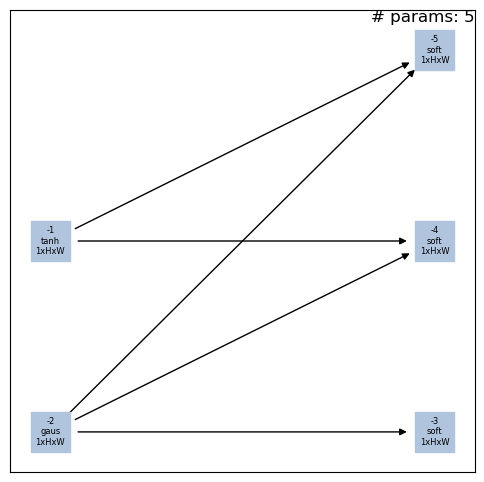

In [12]:
c.draw_nx(size=(6,6))

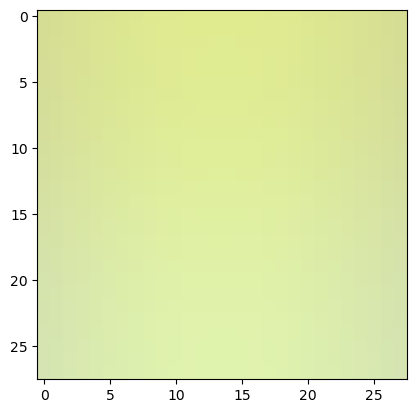

In [13]:
img = c.get_image(channel_first=False).detach().cpu().numpy()
import matplotlib.pyplot as plt
plt.imshow(img)

In [14]:
for _ in range(100):
    c.mutate()


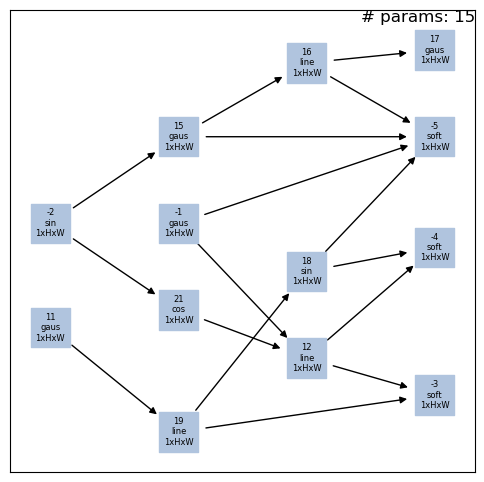

In [16]:
c.draw_nx(size=(6,6))

In [96]:
from gene import Node, NodeType, Connection
import torch
nodes = {}

activation = torch.sin
nodes[0]= Node(0, activation, NodeType.INPUT)
for i in range(1,4):
    nodes[i] = Node(i, activation, NodeType.HIDDEN)
nodes[4] = Node(4, activation, NodeType.OUTPUT)

w = torch.tensor(0.0)

connection_genome = {
    (0,1): Connection((0,1), w.clone()),
    (0,2): Connection((0,2), w.clone()),
    (2,3): Connection((2,3), w.clone()),
    (1,4): Connection((1,4), w.clone()),
    (3,4): Connection((3,4), w.clone())
}

c.connection_genome = connection_genome
c.node_genome = nodes

In [97]:
c.update_node_layers()

0 0
1 1
2 1
3 2
4 3
{0}
0 297.0 1.0
{1, 2}
1 117.0 0.3333333333333333
{3}
3 117.0 0.3333333333333333
{4}
4 27.0 0.0


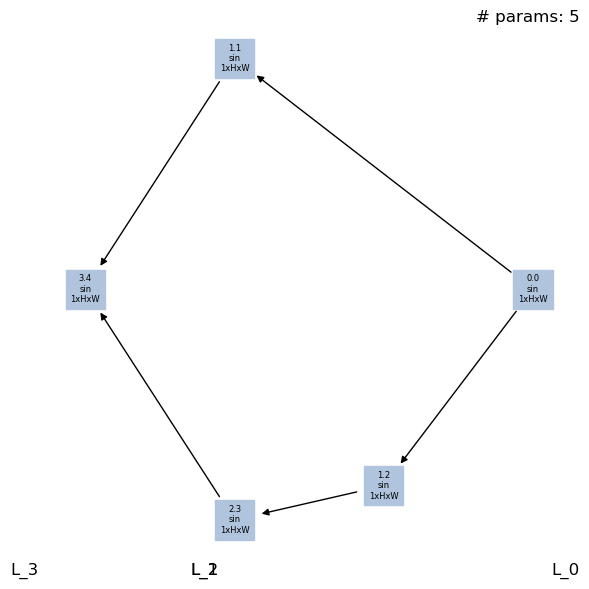

In [100]:
c.draw_nx(size=(6,6))